# Logistic regression exploration

First, I will use sklearns logistic regression to benchmark

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gradient_descent import GradientDescent
from regression_cost_funcs import LogisticCost

[[4.09209144 4.15408643]]
[-5.48300656]
Prediction score:  0.917312


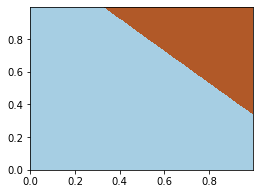

In [2]:
from data_generation import generate_data_binary

X, y = generate_data_binary(1000, seed=67)

# Perform logistic regression using sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y.ravel())
print(clf.coef_)
print(clf.intercept_)

# Create a mesh to plot in
h = .002  # step size in the mesh
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
design = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(design)
Z = Z.reshape(xx.shape)

def f(X):
    val = []
    r, c = X.shape
    for i in range(r):
        if X[i, 0] > 0.5 and X[i, 1] > 0.5:
            val.append(1)
        else:
            val.append(0)
    return np.array(val).reshape(-1, 1)
true_Z = f(design)
# print prediction score
print("Prediction score: ", clf.score(design, true_Z))

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()


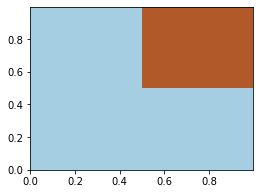

In [3]:
# Plot the true function 

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, true_Z.reshape(xx.shape), cmap=plt.cm.Paired)
plt.show()


In [20]:
#Now we will use use gradient descent to find the optimal beta values

X, y = generate_data_binary(1000, seed=67, add_col_ones=True)
# Initialize beta
beta = np.array([0, 0, 0]).reshape(-1, 1)

# Initialize cost function wrapper
model = LogisticCost()

# Initialize gradient descent
gd = GradientDescent()

# Run gradient descent
beta = gd.train(X, beta, y, model, learning_rate=0.01, n_epochs=1000)

In [21]:
#plot the decision boundary
y_pred = model.predict_class(X, beta)

print("Prediction score:", np.count_nonzero(y == y_pred) / len(y))

Prediction score: 0.925


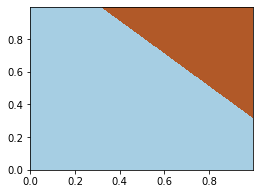

In [22]:
# Plot the decision boundary.

xmin, xmax = 0, 1
ymin, ymax = 0, 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
n = xx.size
design = np.c_[np.ones(n), xx.ravel(), yy.ravel()]
Z = model.predict_class(design, beta)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()